# Data Project - Income and Life Expectancy in the Danish Municipalities

**Import packages**

In [125]:
import pandas as pd
import pydst
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from matplotlib_venn import venn2
import ipywidgets as widgets
import project1_functions

## Introduction

In this project, we examine the relationship between average income and life expectancy across the Danish municipalities based on data from Statistics Denmark. We start by importing, cleaning and sorting the two datasets. After exploring the raw data, we merge the datasets in order to conduct a descriptive analysis, in which we particularly focus on the top and bottom earning municipalities during the period 2008-2018. 

## Read data from DST

In [126]:
Dst = pydst.Dst(lang='en')

# a. Income dataset
income = Dst.get_data(table_id='INDKP105', variables={'OMRÅDE':['*'], 'ENHED':['118'], 'KOEN':['MOK'], 'ALDER1':['00'],
                                                     'INDKINTB':['000'], 'Tid':['*']})

# b. Life expectancy dataset
life = Dst.get_data(table_id='LIVO1', variables={'AKTP':['O1'], 'OMRÅDE':['*'], 'Tid':['*']})

In [127]:
income.head()

,OMRÅDE,ENHED,KOEN,ALDER1,INDKINTB,TID,INDHOLD
0,Ærø,Average income for persons in the group (DKK),"Men and women, total",Total,All,2013,244336
1,Herning,Average income for persons in the group (DKK),"Men and women, total",Total,All,2013,279723
2,Frederikshavn,Average income for persons in the group (DKK),"Men and women, total",Total,All,2013,272244
3,Skive,Average income for persons in the group (DKK),"Men and women, total",Total,All,2013,265916
4,Province Vestjylland,Average income for persons in the group (DKK),"Men and women, total",Total,All,2013,279867


In [128]:
life.head()

,AKTP,OMRÅDE,TID,INDHOLD
0,Life expectancy (years),All Denmark,2008,78.5
1,Life expectancy (years),Region Nordjylland,2008,78.5
2,Life expectancy (years),Region Midtjylland,2008,79.0
3,Life expectancy (years),Region Syddanmark,2008,78.8
4,Life expectancy (years),Region Hovedstaden,2008,78.2


## Clean data

**Rename variables**

In [129]:
# Make a dictionary for renaming the columns
# a. Income dataset
columns_dict = {}
columns_dict['OMRÅDE'] = 'municipality'
columns_dict['INDHOLD'] = 'income'
columns_dict['TID'] = 'year'

income.rename(columns = columns_dict, inplace = True)

# b. Life expectancy dataset
columns_dict_life = {}
columns_dict_life['OMRÅDE'] = 'municipality'
columns_dict_life['INDHOLD'] = 'life_expectancy'
columns_dict_life['TID'] = 'year'

life.rename(columns = columns_dict_life, inplace = True)

**Drop irrelevant variables**

In [130]:
income.drop(['ENHED', 'KOEN', 'ALDER1', 'INDKINTB'], axis=1, inplace=True)
life.drop(['AKTP'], axis=1, inplace=True)

**Drop irrelevant observations**

In [131]:
# Drop all obsevations containing regions or provinces
# a. Income dataset
I = income.municipality.str.contains('Region')
I |= income.municipality.str.contains('Province')
income = income.loc[I == False] 

# b. Life expectancy dataset
I = life.municipality.str.contains('Region')
I |= life.municipality.str.contains('Province')
life = life.loc[I == False] 

## Explore the two datasets

**Observations in the two datasets**

Years in income dataset: [1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018]
Years in life expectancy dataset: [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]
Total number of municipalities in income dataset = 99
Total number of municipalities in life expectancy dataset = 99
Number of municipalities with only non-missing obs. in income dataset = 99
Number of municipalities with only non-missing obs. in life expectancy dataset = 95
Municipalities missing obs. in life expectancy dataset = ['Fanø', 'Læsø', 'Samsø', 'Ærø']


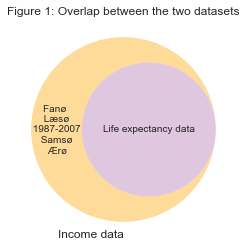

In [132]:
# a. Sort values by municipality and then year
income = income.sort_values(['municipality','year'])
life = life.sort_values(['municipality','year'])

# b. Print the number of years in each dataset
print(f'Years in income dataset: {income.year.unique()}')
print(f'Years in life expectancy dataset: {life.year.unique()}')

# c. Print number of municipalities in each dataset
# i. Print the total number of municipalities in each dataset
print(f'Total number of municipalities in income dataset = {len(income.municipality.unique())}')
print(f'Total number of municipalities in life expectancy dataset = {len(life.municipality.unique())}')

# ii. Drop observations that are non-numeric, i.e. missing due to '..' 
life = life[pd.to_numeric(life['life_expectancy'], errors='coerce').notnull()]
income = income[pd.to_numeric(income['income'], errors='coerce').notnull()]

# iii. Print the number of municipalities with non-missing observations in all years
life = life.groupby('municipality').filter(lambda x: len(x) == 11)
income = income.groupby('municipality').filter(lambda x: len(x) == 32)

print(f'Number of municipalities with only non-missing obs. in income dataset = {len(income.municipality.unique())}')
print(f'Number of municipalities with only non-missing obs. in life expectancy dataset = {len(life.municipality.unique())}')

# iv. Print the municipalities that are not in the life dataset but in the income dataset
not_in_life = [m for m in income.municipality.unique() if m not in life.municipality.unique()]
print(f'Municipalities missing obs. in life expectancy dataset = {not_in_life}')

# d. Plot the overlap of datasets
plt.figure()
plt.title('Figure 1: Overlap between the two datasets')
v = venn2(subsets = (9, 0, 10), set_labels = ('Income data', ''), set_colors=('orange', 'blue'))
v.get_label_by_id('100').set_text('Fanø \n Læsø \n 1987-2007 \n Samsø \n Ærø')
v.get_label_by_id('010').set_text('')
v.get_label_by_id('110').set_text('Life expectancy data')
plt.show()

From the output, we see that the two datasets have the same number of municipalities (note that one of the "municipalities" is actually all of Denmark), but the life expectancy dataset is missing observations for some years for four municipalities: Fanø, Læsø, Samsø, and Ærø. Furthermore, we see that the income dataset has data for the period 1987-2018, whereas the life expectancy dataset only contains data for the period 2008-2018. In other words, the life expectancy dataset is a subset of the income dataset, which is illustrated by the Venn diagram in Figure 1. 

**Plots of the two datasets**

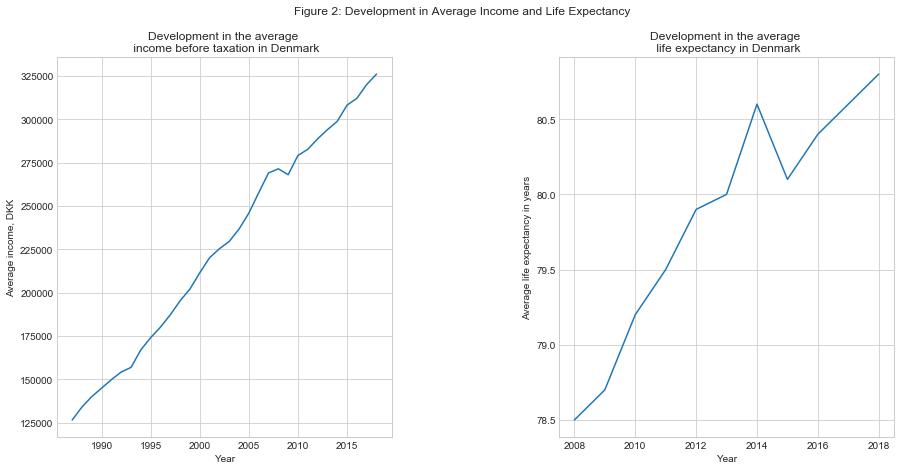

In [133]:
# a. Start static figure with two subplots
f = plt.figure(figsize=(15,7))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

f.suptitle('Figure 2: Development in Average Income and Life Expectancy')
f.subplots_adjust(wspace=0.5, hspace=1)

# b. Add first subplot of average income 
I = income['municipality']=='All Denmark'
avg_income = income.loc[I, 'income']
avg_income = avg_income.astype('float')
year = income.loc[I, 'year']
year = year.astype('float')

ax1.plot(year, avg_income)
ax1.legend('')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average income, DKK')
ax1.set_title('Development in the average \n income before taxation in Denmark')

# c. Add second subplot of average life expectancy
I = life['municipality']=='All Denmark'
year = life.loc[I, 'year']
year = year.astype('float')
avg_life = life.loc[I, 'life_expectancy']
avg_life = avg_life.astype('float')

ax2.plot(year, avg_life)
ax2.legend('')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average life expectancy in years')
ax2.set_title('Development in the average \n life expectancy in Denmark')

# d. Show figure
plt.show()

Figure 2 shows the development in the average income and life expectancy in Denmark for the years where data is available. We see that both the income and the life expectancy have been increasing over the respective periods. The average income had a small drop around 2008-2009, which was expected as this is the years of the financial crisis. The average life expectancy had a sharp increase from 2013-2014 followed by a significant drop, which we are not able to explain. 

**Interactive plots**

In [134]:
# a. Delete observations for all of Denmark, as we are not using them in the assignment from now on
I = income.municipality.str.contains('All Denmark')
income = income.loc[I == False] 

I = life.municipality.str.contains('All Denmark')
life = life.loc[I == False] 

In [135]:
# a. Interactive plot for income
project1_functions.interactive_plot(dataframe=income)

# b. Interactive plot for life expectancy
project1_functions.interactive_plot(dataframe=life)

interactive(children=(Dropdown(description='Municipality', options=('Aabenraa', 'Aalborg', 'Aarhus', 'Albertsl…

interactive(children=(Dropdown(description='Municipality', options=('Aabenraa', 'Aalborg', 'Aarhus', 'Albertsl…

In Figure 3 and 4, it is possible to see the development in income and life expectancy, respectively, for individual municipalities by choosing the specific municipality in the dropdown menu. 

## Merge datasets

We choose to merge the two datasets by inner join, since we are only interested in observations which are in both datasets for the following analysis. Hence, we keep the purple circle from Figure 1 above. 

In [136]:
merge_data = pd.merge(income, life, on=['municipality','year'], how='inner')
merge_data.head()

,municipality,year,income,life_expectancy
0,Aabenraa,2008,255470,78.2
1,Aabenraa,2009,247369,78.5
2,Aabenraa,2010,258176,78.5
3,Aabenraa,2011,261635,78.8
4,Aabenraa,2012,266148,79.1


## Descriptive analysis

In this section, we analyze the merged dataset with the purpose of investigating the relationship between income and life expectancy on a municipality level. 

In [137]:
# Calculating the mean income for each municipality from 2008-2018
mean_income = merge_data.groupby('municipality')['income'].mean()
mean_income

municipality
Aabenraa           270934.090909
Aalborg            276069.818182
Aarhus             287543.090909
Albertslund        269265.818182
Allerød            386573.272727
                       ...      
Vejen              274920.727273
Vejle              298470.363636
Vesthimmerlands    261968.272727
Viborg             285381.636364
Vordingborg        264877.545455
Name: income, Length: 94, dtype: float64

In [138]:
# Calculating the mean income across all municipalities for each year in the sample
merge_data.groupby('year')['income'].mean()

year
2008    274734.159574
2009    270569.053191
2010    282198.787234
2011    285666.882979
2012    291749.351064
2013    296909.680851
2014    301468.989362
2015    310056.819149
2016    313998.712766
2017    321701.117021
2018    326940.787234
Name: income, dtype: float64

The output above clarifies the picture in Figure 2, namely that besides the recession in 2008/2009, the average income in Denmark has risen each year during the 10-year period. 

In [139]:
# Sorting the mean income from lowest to highest for all municipalities in each year
income_sorted = merge_data.sort_values(by=['year', 'income'])
income_sorted

,municipality,year,income,life_expectancy
561,Langeland,2008,225423,77.9
594,Lolland,2008,225811,75.4
88,Bornholm,2008,229888,78.0
638,Morsø,2008,236160,77.6
946,Tønder,2008,236657,77.9
...,...,...,...,...
263,Furesø,2018,425765,82.7
615,Lyngby-Taarbæk,2018,450436,82.4
483,Hørsholm,2018,522378,83.2
791,Rudersdal,2018,563994,83.2


Figure 5 and 6 below show the ten municipalities with the highest and lowest average incomes in 2008, respectively, while the subsequent two figures, Figure 7 and 8, display the same for 2018.

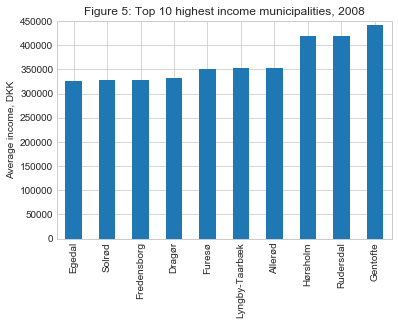

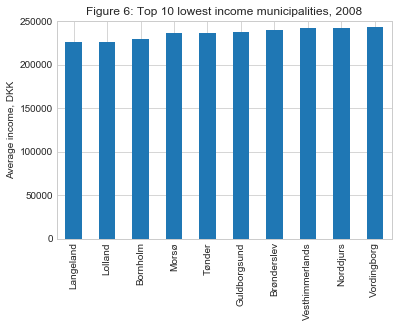

In [140]:
# a. Plotting the 10 municipalities with the highest average income, 2008
income1 = merge_data.loc[merge_data['year'] == 2008, :]
income1 = income1.sort_values(by=['income'])

high = income1.loc[income1['income'] >= 325000, :]
high

ax = high.plot(x='municipality', y='income', kind='bar');
ax.set_ylabel('Average income, DKK');
ax.set_xlabel('');
ax.set_title('Figure 5: Top 10 highest income municipalities, 2008');
ax.get_legend().remove();
ax.set_ylim([0,450000]);

# b. Plotting the 10 municipalities with the lowest average income, 2008
income2 = merge_data.loc[merge_data['year'] == 2008, :]
income2 = income2.sort_values(by=['income'])

low = income2.loc[income2['income'] <= 243000, :]
low

ax = low.plot(x='municipality', y='income', kind='bar');
ax.set_ylabel('Average income, DKK');
ax.set_xlabel('');
ax.set_title('Figure 6: Top 10 lowest income municipalities, 2008');
ax.get_legend().remove();
ax.set_ylim([0,250000]);

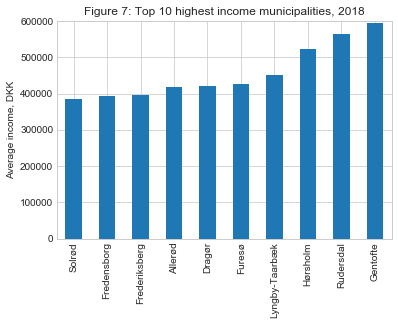

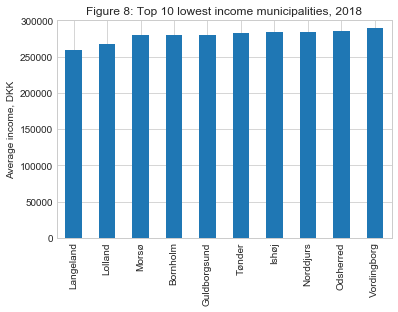

In [141]:
# a. Plotting the 10 municipalities with the highest average income, 2018
income1 = merge_data.loc[merge_data['year'] == 2018, :]
income1 = income1.sort_values(by=['income'])

high = income1.loc[income1['income'] >= 380000, :]
high

ax = high.plot(x='municipality', y='income', kind='bar');
ax.set_ylabel('Average income, DKK');
ax.set_xlabel('');
ax.set_title('Figure 7: Top 10 highest income municipalities, 2018');
ax.get_legend().remove();
ax.set_ylim([0,600000]);

# b. Plotting the 10 municipalities with the lowest average income, 2018
income2 = merge_data.loc[merge_data['year'] == 2018, :]
income2 = income2.sort_values(by=['income'])

low = income2.loc[income2['income'] <= 289200, :]
low

ax = low.plot(x='municipality', y='income', kind='bar');
ax.set_ylabel('Average income, DKK');
ax.set_xlabel('');
ax.set_title('Figure 8: Top 10 lowest income municipalities, 2018');
ax.get_legend().remove();
ax.set_ylim([0,300000]);

From these plots, one can note that 9 out of 10 of the municipalities with the highest average incomes in 2008 remain in the top 10 in 2018 - with the top 3 being unchanged. For the lowest income municipalities, the corresponding number is 8 out of 10. Despite the fact that the average income has risen across municipalities during the period considered, the respective figures thus indicate that there is not much income mobility at the top and at the bottom of the municipality "income distribution", so to speak.     

In [142]:
# Calculating the mean life expectancy for each municipality from 2008-2018
# i. Changing the format of life_expectancy to numeric
merge_data['life_expectancy'] = pd.to_numeric(merge_data['life_expectancy'])

# ii. Calculating the mean using groupby()
mean_life = merge_data.groupby('municipality')['life_expectancy'].mean()
mean_life

municipality
Aabenraa           79.409091
Aalborg            79.481818
Aarhus             80.227273
Albertslund        79.390909
Allerød            81.681818
                     ...    
Vejen              80.036364
Vejle              79.890909
Vesthimmerlands    79.581818
Viborg             80.336364
Vordingborg        77.881818
Name: life_expectancy, Length: 94, dtype: float64

In [143]:
# Calculating the mean life expectancy across all municipalities for each year in the sample
merge_data.groupby('year')['life_expectancy'].mean()

year
2008    78.196809
2009    78.421277
2010    78.672340
2011    78.897872
2012    79.236170
2013    79.523404
2014    79.931915
2015    80.198936
2016    80.487234
2017    80.655319
2018    80.841489
Name: life_expectancy, dtype: float64

The output above shows that the average life expectancy in Denmark has increased each year during the 10-year period, corresponding to a total increase in life expectancy of nearly three years. 

In [144]:
# Sorting life expectancy from lowest to highest for all municipalities in each year
life_sorted = merge_data.sort_values(by=['year', 'life_expectancy'])
life_sorted

,municipality,year,income,life_expectancy
594,Lolland,2008,225811,75.4
121,Copenhagen,2008,263569,75.6
495,Ishøj,2008,253059,75.8
715,Odsherred,2008,243182,76.6
319,Guldborgsund,2008,237744,76.7
...,...,...,...,...
263,Furesø,2018,425765,82.7
54,Allerød,2018,417514,83.1
483,Hørsholm,2018,522378,83.2
791,Rudersdal,2018,563994,83.2


Figure 9 and 10 below show the ten municipalities with the highest and lowest life expectancies in 2008, respectively, while Figure 11 and 12 display the same for 2018. 

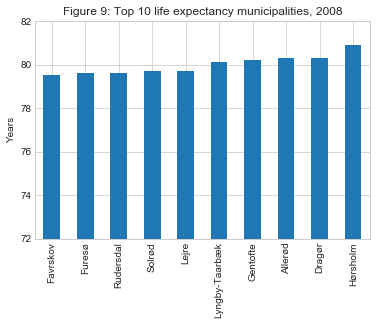

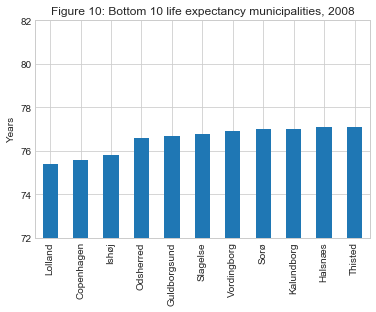

In [145]:
# a. Plotting the 10 municipalities with the highest life expectancy, 2008
life1 = merge_data.loc[merge_data['year'] == 2008, :]
life1 = life1.sort_values(by=['life_expectancy'])

high = life1.loc[life1['life_expectancy'] >= 79.5, :]

ax = high.plot(x='municipality', y='life_expectancy', kind='bar');
ax.set_ylabel('Years');
ax.set_xlabel('');
ax.set_title('Figure 9: Top 10 life expectancy municipalities, 2008');
ax.get_legend().remove();
ax.set_ylim([72,82]);

# b. Plotting the 10 municipalities with the lowest life expectancy, 2008
life2 = merge_data.loc[merge_data['year'] == 2008, :]
life2 = life2.sort_values(by=['life_expectancy'])

low = life2.loc[life2['life_expectancy'] <= 77.1, :]

ax = low.plot(x='municipality', y='life_expectancy', kind='bar');
ax.set_ylabel('Years');
ax.set_xlabel('');
ax.set_title('Figure 10: Bottom 10 life expectancy municipalities, 2008');
ax.get_legend().remove();
ax.set_ylim([72,82]);

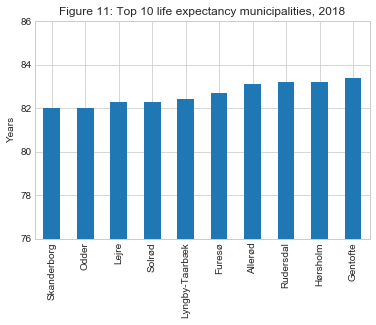

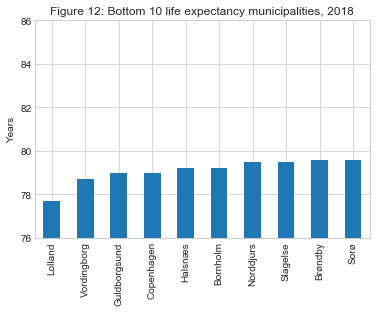

In [146]:
# a. Plotting the 10 municipalities with the highest life expectancy, 2018
life1 = merge_data.loc[merge_data['year'] == 2018, :]
life1 = life1.sort_values(by=['life_expectancy'])

high = life1.loc[life1['life_expectancy'] >= 82.0, :]

ax = high.plot(x='municipality', y='life_expectancy', kind='bar');
ax.set_ylabel('Years');
ax.set_xlabel('');
ax.set_title('Figure 11: Top 10 life expectancy municipalities, 2018');
ax.get_legend().remove();
ax.set_ylim([76,86]);

# b. Plotting the 10 municipalities with the lowest life expectancy, 2018
life2 = merge_data.loc[merge_data['year'] == 2018, :]
life2 = life2.sort_values(by=['life_expectancy'])

low = life2.loc[life2['life_expectancy'] <= 79.6, :]

ax = low.plot(x='municipality', y='life_expectancy', kind='bar');
ax.set_ylabel('Years');
ax.set_xlabel('');
ax.set_title('Figure 12: Bottom 10 life expectancy municipalities, 2018');
ax.get_legend().remove();
ax.set_ylim([76,86]);

From these figures, one can deduce that 8 out of 10 of the municipalities with the highest life expectancy in 2008 remain in the top 10 in 2018, whereas the corresponding number for the bottom 10 is 7 out of 10 municipalities. More interestingly, 8 municipalities in the top 10 for income are also found in the top 10 for life expectancy in 2008, while 3 municipalities are in the bottom 10 for both income and life expectancy. The equivalent numbers for 2018 are 7 and 5, respectively. Overall, this indicates that there may be a connection between income and life expectancy across the Danish municipalities.  

We now want to visualize the correlation between the two variables. From the code below we obtain two scatter plots, showing the relationship between the average income and the life expectancy in all the Danish municipalities in 2008 and 2018, respectively.   

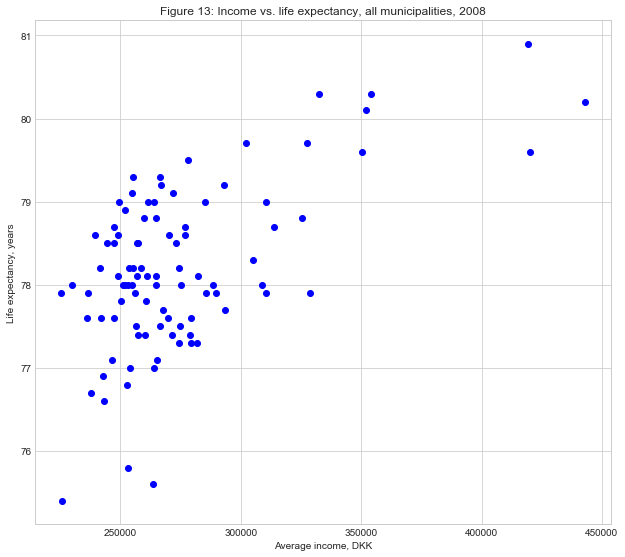

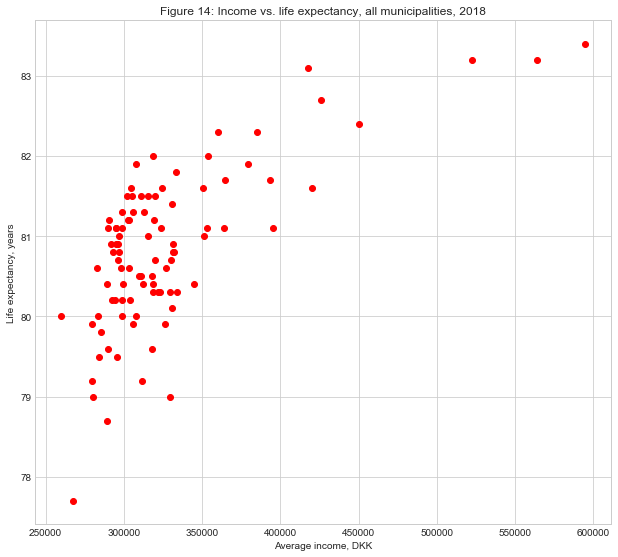

In [147]:
# a. Creating a scatter plot for 2008
data2008 = merge_data.loc[merge_data['year'] == 2008]
data2008.head()

#Create new dataframe for 2008, sort by ascending income
df2008 = pd.DataFrame(data=data2008, columns=['income', 'life_expectancy']); 
df2008 = data2008.sort_values('income', ascending=True)
df2008.head()
fig = plt.figure(figsize=(8,7))
ax = fig.add_axes([0,0,1,1])
ax.scatter(df2008.income, df2008.life_expectancy, color='blue')
ax.set_xlabel('Average income, DKK')
ax.set_ylabel('Life expectancy, years')
ax.set_title('Figure 13: Income vs. life expectancy, all municipalities, 2008')

# b. Creating a scatter plot for 2018
data2018 = merge_data.loc[merge_data['year'] == 2018]
data2018.head()

#Create new dataframe for 2018, sort by ascending income
df2018 = pd.DataFrame(data=data2018, columns=['income', 'life_expectancy']); 
df2018 = data2018.sort_values('income', ascending=True)
df2018.head()
fig=plt.figure(figsize=(8,7))
ax=fig.add_axes([0,0,1,1])
ax.scatter(df2018.income, df2018.life_expectancy, color='red')
ax.set_xlabel('Average income, DKK')
ax.set_ylabel('Life expectancy, years')
ax.set_title('Figure 14: Income vs. life expectancy, all municipalities, 2018')
plt.show()

Overall, it is evident that there is a positive relationship between the two variables, implying that municipalities with higher average incomes tend to live longer compared to lower income municipalities. The positive correlation between income and life expectancy is in line with the general perception of richer people being able to afford a healthier lifestyle, which potentially results in a longer life. However, it should be noted that the scatter plots merely present a correlation between the two variables and not necessarily a causal relationship.   

## Conclusion

In this project, we have examined income and life expectancy data for all the Danish municipalities. Based on the available data from Statistics Denmark, we find that the average income per person in Denmark has been increasing for the last 30 years, while the same holds for the life expectancy during the last decade. A closer inspection of the municipality data yields an interesting picture in the sense that the 10 highest earning municipalities (in terms of average income per capita) in 2018 largely consisted of the same municipalities as in 2008, and similarly for the 10 lowest earning municipalities. Moreover, we find an overall tendency of a positive correlation between income and life expectancy across the Danish municipalities, i.e. municipalities with a higher average income per capita tend to have a higher life expectancy. This is particularly apparent for the "richest" and "poorest" municipalities.         